In [1]:
%load_ext autoreload
%autoreload 2

import pipit as pp
import pandas as pd
import pipit.plotting.core as vis
from pipit.partitions import Event, Partition, get_partition_graph

# Preprocessing

## Load Dataset

In [2]:
#Path to OTF2 traces
dirname = "../../pipit/tests/data/game-of-life-otf2"

# Use pipit's ``from_otf2`` API to read in the OTF2 traces.
# The result is stored into pipit's Trace data structure.
trace = pp.Trace.from_otf2(dirname)

# Printout the DataFrame component of the Trace.
display (trace.events.columns)
display (trace.events[trace.events['Process'] == 0].head(40))
display (trace.events.loc[17]['Attributes'])

Index(['Timestamp (ns)', 'Event Type', 'Name', 'Thread', 'Process',
       'Attributes'],
      dtype='object')

,Timestamp (ns),Event Type,Name,Thread,Process,Attributes
2,1.539486e+05,Instant,ProgramBegin,0,0,"{'attributes': {'Attribute 2': 1463386}, 'prog..."
3,1.764308e+05,Enter,"int main(int, char**)",0,0,{'region': 'Region 3'}
5,1.022166e+06,Enter,"void read_input_file(int**, const string&)",0,0,{'region': 'Region 5'}
13,8.269680e+08,Leave,"void read_input_file(int**, const string&)",0,0,None
15,8.270060e+08,Enter,MPI_Init,0,0,{'region': 'Region 151'}
23,1.478312e+09,Leave,MPI_Init,0,0,None
27,1.478332e+09,Enter,MPI_Comm_size,0,0,{'region': 'Region 40'}
33,1.478341e+09,Leave,MPI_Comm_size,0,0,None
35,1.478343e+09,Enter,MPI_Comm_rank,0,0,{'region': 'Region 37'}
38,1.478353e+09,Leave,MPI_Comm_rank,0,0,None


{'region': 'Region 151'}

In [3]:
# Plot Timeline
import os 
os.environ["BOKEH_ALLOW_WS_ORIGIN"] = 'localhost:8888'

trace.plot_timeline()

/Users/movsesyanae/Programming/CMSC714/pipit/pipit/plotting/core.py:80: FutureWarning: factorize with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  codes, uniques = pd.factorize(y_tuples, sort=True)
/Users/movsesyanae/Programming/CMSC714/pipit/pipit/trace.py:555: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(groupby_column)
/Users/movsesyanae/Programming/CMSC714/pipit/pipit/plotting/_util.py:465: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  funcs.groupby("Name")["_depth"]
/Users/movsesyanae/Programming/CMSC714/pipit/pipit/

## Matching MPI Events

In [4]:
trace._match_mpi()

In [5]:
# Get a filtered event dataframe with only MPI events.
mpi_trace = trace.events[trace.events['Name'].str.contains('MpiSend|MpiRecv')]
display (mpi_trace)

,Timestamp (ns),Event Type,Name,Thread,Process,Attributes,_matching_event,_matching_timestamp,_depth,_parent,_children,time.inc,time.exc
44,1.478383e+09,Instant,MpiSend,0,2,"{'receiver': 1, 'communicator': 'Comm 1', 'msg...",62,1.478580e+09,NaN,NaN,None,NaN,NaN
45,1.478385e+09,Instant,MpiSend,0,1,"{'receiver': 0, 'communicator': 'Comm 1', 'msg...",48,1.478439e+09,NaN,NaN,None,NaN,NaN
48,1.478439e+09,Instant,MpiRecv,0,0,"{'sender': 1, 'communicator': 'Comm 1', 'msg_t...",45,1.478385e+09,NaN,NaN,None,NaN,NaN
51,1.478451e+09,Instant,MpiSend,0,0,"{'receiver': 1, 'communicator': 'Comm 1', 'msg...",56,1.478561e+09,NaN,NaN,None,NaN,NaN
56,1.478561e+09,Instant,MpiRecv,0,1,"{'sender': 0, 'communicator': 'Comm 1', 'msg_t...",51,1.478451e+09,NaN,NaN,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,1.480007e+09,Instant,MpiRecv,0,2,"{'sender': 1, 'communicator': 'Comm 1', 'msg_t...",448,1.479972e+09,NaN,NaN,None,NaN,NaN
464,1.480008e+09,Instant,MpiSend,0,2,"{'receiver': 3, 'communicator': 'Comm 1', 'msg...",467,1.480027e+09,NaN,NaN,None,NaN,NaN
467,1.480027e+09,Instant,MpiRecv,0,3,"{'sender': 2, 'communicator': 'Comm 1', 'msg_t...",464,1.480008e+09,NaN,NaN,None,NaN,NaN
470,1.480028e+09,Instant,MpiSend,0,3,"{'receiver': 2, 'communicator': 'Comm 1', 'msg...",473,1.480037e+09,NaN,NaN,None,NaN,NaN


# Phase Partitioning

## Create Event Graph (Linked List)

In [6]:
# Visualise Event Graph
#from graphviz import Digraph

# Function to create a DOT representation of linked lists
def linked_lists_to_dot(start_event_ids, dict):
    dot = Digraph(comment='Process Event Graph')

    for i, se in enumerate(start_event_ids):
        current_node = dict[se]
        while current_node:
            dot.node(f"{current_node.event_id}_{current_node.event_name}", str(current_node.event_name) + ":" + str(current_node.event_id))
            if current_node.get_next_event():
                dot.edge(f"{current_node.event_id}_{current_node.event_name}", f"{current_node.get_next_event().event_id}_{current_node.get_next_event().event_name}")

            if current_node.event_name == 'MpiSend' and current_node.has_matching_event():
                dot.edge(f"{current_node.event_id}_{current_node.event_name}", f"{current_node.get_matching_event().event_id}_{current_node.get_matching_event().event_name}")
            current_node = current_node.get_next_event()

    return dot

# Create a DOT representation
#dot_representation = linked_lists_to_dot(start_event_ids, event_dict)
#dot_representation.attr(rankdir='LR')  
# Display the DOT representation in a Jupyter Notebook (optional)
#dot_representation


## Create Partition Graph

In [7]:
start_partition_ids, partition_dict = get_partition_graph(trace)
print (start_partition_ids)


for paritition_id, partition in partition_dict.items():
    print (f"{partition.partition_id} - {partition.event_dict}")

Skipped event - MpiCollectiveBegin
Skipped event - MpiCollectiveEnd
Skipped event - MpiCollectiveBegin
Skipped event - MpiCollectiveEnd
Skipped event - MpiCollectiveBegin
Skipped event - MpiCollectiveEnd
Skipped event - MpiCollectiveBegin
Skipped event - MpiCollectiveEnd
Skipped event - MpiCollectiveBegin
Skipped event - MpiCollectiveEnd
Skipped event - MpiCollectiveBegin
Skipped event - MpiCollectiveEnd
Skipped event - MpiCollectiveBegin
Skipped event - MpiCollectiveEnd
Skipped event - MpiCollectiveBegin
Skipped event - MpiCollectiveEnd
Skipped event - MpiCollectiveBegin
Skipped event - MpiCollectiveEnd
Skipped event - MpiCollectiveBegin
Skipped event - MpiCollectiveEnd
Skipped event - MpiCollectiveBegin
Skipped event - MpiCollectiveEnd
Skipped event - MpiCollectiveBegin
Skipped event - MpiCollectiveEnd
Skipped event - MpiCollectiveBegin
Skipped event - MpiCollectiveEnd
Skipped event - MpiCollectiveBegin
Skipped event - MpiCollectiveEnd
Skipped event - MpiCollectiveBegin
Skipped event

## Display Initial Partition Graph

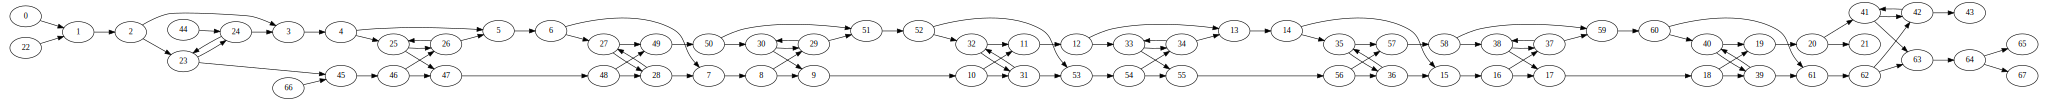

In [8]:
from graphviz import Digraph

# Function to create a DOT representation of linked lists
def visualise(start_ids, partition_dict, dot=None):
    visited = []
    def visualise_recursive(start_ids, partition_dict, dot):
        nonlocal visited
        if dot is None:
            dot = Digraph(comment='Partition Graph')

        for i, sp in enumerate(start_ids):
            current_partition = partition_dict[sp]
            if current_partition.partition_id in visited:
                return dot
            dot.node(f"{current_partition.partition_id}", str(current_partition.partition_id))
            visited.append(current_partition.partition_id)
            children_ids = current_partition.get_children()
            for child_id in children_ids:
                child_partition = partition_dict[child_id]
                dot = visualise_recursive([child_id], partition_dict, dot)
                dot.edge(f"{current_partition.partition_id}", f"{child_partition.partition_id}")
        return dot
    return visualise_recursive(start_ids, partition_dict, dot)

 # Sample linked lists

# Create a DOT representation
dot_representation = visualise(start_partition_ids, partition_dict)
dot_representation.attr(rankdir='LR')  
# Display the DOT representation in a Jupyter Notebook (optional)
dot_representation

## Merge Mandatory Partitions

In [9]:
components = Partition.tarjan_strongly_connected(partition_dict)
print (components)

[[43], [65], [67], [64], [63], [42, 41], [21], [20], [19], [62], [61], [39, 40], [60], [59], [18], [17], [37, 38], [58], [57], [16], [15], [36, 35], [14], [13], [56], [55], [34, 33], [12], [11], [54], [53], [31, 32], [52], [51], [10], [9], [29, 30], [50], [49], [8], [7], [28, 27], [6], [5], [48], [47], [26, 25], [4], [3], [46], [45], [24, 23], [2], [1], [0], [22], [44], [66]]


In [10]:
partition_dict = Partition.merge_strongly_connected_components(partition_dict, components)
for sid in start_partition_ids:
    if sid not in partition_dict:
        print ("Something is wrong")

## Display Partition DAG after Mandatory Partitions

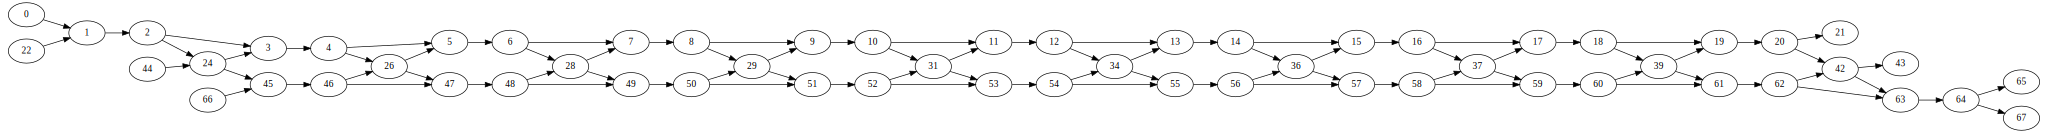

In [11]:
from graphviz import Digraph

 # Sample linked lists
# Create a DOT representation
dot_representation = visualise(start_partition_ids, partition_dict)
dot_representation.attr(rankdir='LR')  
# Display the DOT representation in a Jupyter Notebook (optional)
dot_representation

## Leap Partitions

In [12]:
def print_leaps(dag):
    for i, leap in enumerate(dag.leaps):
        if len(leap.partitions_ids) < 1:
            continue
        print('Leap', i)
        print('  ', leap.partitions_ids)

### Create Leaps

In [13]:
from pipit.partitions.leap import Partition_DAG, Leap

unique_processes = trace.events['Process'].unique()

root_partitions = []
for root_id in start_partition_ids:
    root_partitions.append(partition_dict[root_id])
    print(root_id)
    print(partition_dict[root_id].partition_id)

dag = Partition_DAG(root_partitions, partition_dict, set(unique_processes))
dag.create_dag()
dag.calculate_distance()
dag.create_leaps()

0
0
22
22
44
44
66
66


### Display Leaps Before Completion

In [14]:
print_leaps(dag)

Leap 0
   {0, 66, 44, 22}
Leap 1
   {1}
Leap 2
   {2}
Leap 3
   {24}
Leap 4
   {3, 45}
Leap 5
   {4, 46}
Leap 6
   {26}
Leap 7
   {5, 47}
Leap 8
   {48, 6}
Leap 9
   {28}
Leap 10
   {49, 7}
Leap 11
   {8, 50}
Leap 12
   {29}
Leap 13
   {9, 51}
Leap 14
   {10, 52}
Leap 15
   {31}
Leap 16
   {11, 53}
Leap 17
   {12, 54}
Leap 18
   {34}
Leap 19
   {13, 55}
Leap 20
   {56, 14}
Leap 21
   {36}
Leap 22
   {57, 15}
Leap 23
   {16, 58}
Leap 24
   {37}
Leap 25
   {17, 59}
Leap 26
   {18, 60}
Leap 27
   {39}
Leap 28
   {19, 61}
Leap 29
   {20, 62}
Leap 30
   {42, 21}
Leap 31
   {43, 63}
Leap 32
   {64}
Leap 33
   {65, 67}


### Complete Leaps

In [15]:
dag.complete_leaps(force_merge=False)

merging partition 65 to leap 32
merging partition 67 to leap 32


### Display Leaps After Completion

In [16]:
print_leaps(dag)

Leap 0
   {0, 66, 44, 22}
Leap 30
   {21}
Leap 31
   {43}
Leap 32
   {65, 67}


# Step Alignment

In [17]:
dag.global_step_assignment()

No cycle found.
No cycle found.
No cycle found.
No cycle found.


# Calculate Lateness

In [18]:
dag.calculate_lateness()
dag.calculate_differential_lateness()
display(dag.global_step_df.head(10))


,PartitionId,EventId,EventName,Stride,NextStride,Process,Matching Event ID,Step,Matching Step,Matching Process,Lateness,DiffLateness
0,0,2,ProgramBegin,0,1,0,-1,0,NaN,NaN,153948.620045,153948.620045
1,22,8,ProgramBegin,0,1,1,-1,0,NaN,NaN,10147668.744609,10147668.744609
2,66,6,ProgramBegin,0,1,3,-1,0,NaN,NaN,9944634.221664,9944634.221664
3,44,0,ProgramBegin,0,1,2,-1,0,NaN,NaN,0.0,0.0
4,0,45,MpiSend,1,2,1,48,1,2.0,0.0,0.0,0.0
5,44,44,MpiSend,1,2,2,62,1,6.0,1.0,141817.30505,141817.30505
6,0,48,MpiRecv,2,2,0,45,2,1.0,1.0,0.0,0.0
7,0,51,MpiSend,2,3,0,56,3,4.0,1.0,0.0,0.0
8,0,56,MpiRecv,3,3,1,51,4,3.0,0.0,0.0,0.0
9,44,59,MpiSend,3,4,1,65,5,6.0,2.0,0.0,0.0


In [21]:
# quick fix for now - this won't be needed once all operations are taken into account
df = dag.global_step_df
df.loc[df['EventName'] == 'ProgramBegin', 'Lateness'] = 0.0
df.loc[df['EventName'] == 'ProgramBegin', 'DiffLateness'] = 0.0
display(dag.global_step_df.head(10))

,PartitionId,EventId,EventName,Stride,NextStride,Process,Matching Event ID,Step,Matching Step,Matching Process,Lateness,DiffLateness
0,0,2,ProgramBegin,0,1,0,-1,0,NaN,NaN,0.0,0.0
1,22,8,ProgramBegin,0,1,1,-1,0,NaN,NaN,0.0,0.0
2,66,6,ProgramBegin,0,1,3,-1,0,NaN,NaN,0.0,0.0
3,44,0,ProgramBegin,0,1,2,-1,0,NaN,NaN,0.0,0.0
4,0,45,MpiSend,1,2,1,48,1,2.0,0.0,0.0,0.0
5,44,44,MpiSend,1,2,2,62,1,6.0,1.0,141817.30505,141817.30505
6,0,48,MpiRecv,2,2,0,45,2,1.0,1.0,0.0,0.0
7,0,51,MpiSend,2,3,0,56,3,4.0,1.0,0.0,0.0
8,0,56,MpiRecv,3,3,1,51,4,3.0,0.0,0.0,0.0
9,44,59,MpiSend,3,4,1,65,5,6.0,2.0,0.0,0.0


# Visualizations

In [25]:
def lateness_vis(df, coloring_field: str = 'EventName'):
    from bokeh.transform import linear_cmap
    from bokeh.models import ColumnDataSource, HoverTool
    import bokeh
    from bokeh.plotting import figure, show, output_notebook
    from bokeh.models import ColumnDataSource
    from bokeh.transform import factor_cmap, dodge
    from bokeh.palettes import Spectral5

    p = figure(title = "Trace", sizing_mode="stretch_width", height=200, tools="hover") 
    source = ColumnDataSource(df)
    p.y_range.flipped = True  # Flip the y-axis
    # index_cmap = factor_cmap('EventName', 
    #                          palette=Spectral5, 
    #                          factors=sorted(df['EventName'].unique()))

    
    if coloring_field == 'EventName':
        index_cmap = factor_cmap('EventName', 
                                palette=Spectral5, 
                                factors=sorted(df['EventName'].unique()))

    else:
        metric = df[coloring_field]
        # average = metric.mean()
        # std_dev = metric.std()
        # high = average
        # high = average + (std_dev / 16)
        # low = average -  std_dev
        # low = max(low, 0)

        high = df[coloring_field].max()
        low = df[coloring_field].min()
        # pallete = bokeh.palettes.cividis(100)
        # pallete = bokeh.palettes.Plasma256
        # pallete = bokeh.palettes.Turbo256
        pallete = bokeh.palettes.RdYlGn11
        # pallete = bokeh.palettes.Greys256[::-1]
        index_cmap = linear_cmap(coloring_field, low=low, high=high, palette=pallete)
        # print('min', df[coloring_field].min())
        # print('max', df[coloring_field].max())
        # print('low',low)
        # print('high',high)

    hover = HoverTool(tooltips=[("Process", "@Process"), ("Step", "@Step"), ("Lateness", "@Lateness")])
    p.add_tools(hover)  


    p.hbar(source=source,
        y="Process",
        right=dodge("Step", 1),
        left="Step",
        height=0.5,
        line_color="black",
        fill_color=index_cmap)

    p.segment(source=source,
            y0="Process",
            x1=dodge("Matching Step", 0.5),
            x0=dodge("Step", 0.5),
            y1="Matching Process", 
            color="black")
    p.yaxis.ticker = bokeh.models.FixedTicker(ticks=list(df['Process'].unique()))


    show(p) 

## Aligned Send and Receives 

In [23]:
lateness_vis(df)

## Colored by Lateness

In [26]:
lateness_vis(df, coloring_field='Lateness')

## Colored by Differential Lateness

In [27]:
lateness_vis(df, coloring_field='DiffLateness')

ERROR:bokeh.server.views.ws:Refusing websocket connection from Origin 'vscode-webview://0v4nf0fqo6ssctknjlud9chmphifmj675hikg13dn74nc972slcf';                       use --allow-websocket-origin=0v4nf0fqo6ssctknjlud9chmphifmj675hikg13dn74nc972slcf or set BOKEH_ALLOW_WS_ORIGIN=0v4nf0fqo6ssctknjlud9chmphifmj675hikg13dn74nc972slcf to permit this; currently we allow origins {'localhost:8888'}
